# Detecting Pneumonia / COVID-19 / Normal with Chest X Ray using PyTorch
>**IT702 | DEEP LEARNING - MiniProject [Evaluation for 20 Marks]**


> **Submitted By : SHANKARANARAYAN N | M.TECH[RESEARCH] | Dept. of IT**

Image classification of Chest X Rays in one of three classes: Normal, Viral Pneumonia, COVID-19

Dataset from [COVID-19 Radiography Dataset](https://www.kaggle.com/tawsifurrahman/covid19-radiography-database) on Kaggle





---


#Connecting to Google Drive

PLEASE NOTE THAT ALL THE DATA RELATED TO THE PROJECT IS STORED IN MY GOOGLE DRIVE.


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls gdrive/MyDrive/COVID2

train




---


# **PART-1**
**NAIVE APPROCH**

Here, we construct a simple CNN with the help of Keras and Tensorflow. This is a naive approch to perform binary classification between Pneumonia and Non-Pneumonia X-rays.

In [ ]:
import os
#main_dir="/content/datasets/Data"
main_dir="/content/gdrive/MyDrive/edited_data"
train_dir=os.path.join(main_dir,'train')
test_dir=os.path.join(main_dir,'test')
#directory with the training pnumonia images
train_pneu_dir=os.path.join(train_dir,'viral')
#directory with the training normal images
train_normal_dir=os.path.join(train_dir,'normal')
#directory with the testing pnumonia images
test_pneu_dir=os.path.join(test_dir,'viral')
#directory with the testing normal images
test_normal_dir=os.path.join(test_dir,'normal')

In [ ]:
#print the filenames
train_pneu_names=os.listdir(train_pneu_dir)
train_normal_names=os.listdir(train_normal_dir)
test_pneu_names=os.listdir(test_pneu_dir)
test_normal_names=os.listdir(test_normal_dir)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Image agumentation increase size of training set without accquirnig new images
dgen_train=ImageDataGenerator(rescale=1./255,
                              validation_split=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True)
dgen_validation=ImageDataGenerator(rescale=1./255)
dgen_test=ImageDataGenerator(rescale=1./255)

train_generator=dgen_train.flow_from_directory(train_dir,
                                               target_size=(150,150),
                                               subset='training',
                                               batch_size=32,
                                               class_mode='binary')

validation_generator=dgen_train.flow_from_directory(train_dir,
                                               target_size=(150,150),
                                               subset='validation',
                                               batch_size=32,
                                               class_mode='binary')

test_generator=dgen_test.flow_from_directory(test_dir,
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='binary')

Found 2372 images belonging to 3 classes.
Found 592 images belonging to 3 classes.
Found 865 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'covid': 0, 'normal': 1, 'viral': 2}

In [ ]:
#creating the naive CNN for classification
from tensorflow.keras.models import Sequential #used to model the neural network
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout,Flatten,Dense,MaxPooling2D
from tensorflow.keras.optimizers import Adam #
model=Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)            

In [ ]:
#Compile model
model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Train model
history2=model.fit(train_generator,epochs=15,validation_data=validation_generator,batch_size=16)

Epoch 1/15
75/75 [==============================] - 798s 11s/step - loss: 0.0000e+00 - accuracy: 0.4358 - val_loss: 0.0000e+00 - val_accuracy: 0.4139
Epoch 2/15
75/75 [==============================] - 48s 647ms/step - loss: 0.0000e+00 - accuracy: 0.4554 - val_loss: 0.0000e+00 - val_accuracy: 0.5203
Epoch 3/15
75/75 [==============================] - 48s 643ms/step - loss: 0.0000e+00 - accuracy: 0.5105 - val_loss: 0.0000e+00 - val_accuracy: 0.5389
Epoch 4/15
75/75 [==============================] - 48s 640ms/step - loss: 0.0000e+00 - accuracy: 0.4968 - val_loss: 0.0000e+00 - val_accuracy: 0.5203
Epoch 5/15
75/75 [==============================] - 48s 637ms/step - loss: 0.0000e+00 - accuracy: 0.4901 - val_loss: 0.0000e+00 - val_accuracy: 0.5118
Epoch 6/15
75/75 [==============================] - 49s 648ms/step - loss: 0.0000e+00 - accuracy: 0.4974 - val_loss: 0.0000e+00 - val_accuracy: 0.4932
Epoch 7/15
75/75 [==============================] - 48s 646ms/step - loss: 0.0000e+00 - accurac

Text(0.5, 0, 'epoch')

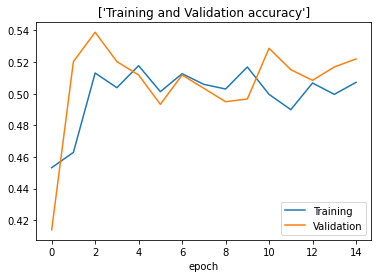

In [ ]:
#plot graph between training and validation accuarcy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title(['Training and Validation accuracy'])
plt.xlabel('epoch')

In [ ]:
# get the test acuarcy and loss
test_loss,test_acc=model.evaluate(test_generator)
print('Test Loss :{} Test Accuracy:{}'.format(test_loss,test_acc))

28/28 [==============================] - 210s 8s/step - loss: 0.0000e+00 - accuracy: 0.4578
Test Loss :0.0 Test Accuracy:0.4578034579753876


In [ ]:
#testing

from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
for filename in uploaded.keys():
  img_path='/content/'+filename
  img=image.load_img(img_path,target_size=(150,150))
  images=image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(filename)

  if prediction ==2:
    print("Pnemonia Positive")
  elif prediction ==1:
    print("Normal")
  else:
    print("Covid")


Saving COVID-19 (971).png to COVID-19 (971).png
Saving COVID-19 (972).png to COVID-19 (972).png
Saving NORMAL (1000).png to NORMAL (1000).png
Saving NORMAL (1001).png to NORMAL (1001).png
Saving Viral Pneumonia (996).png to Viral Pneumonia (996).png
Saving Viral Pneumonia (997).png to Viral Pneumonia (997).png
COVID-19 (971).png
Covid
COVID-19 (972).png
Covid
NORMAL (1000).png
Normal
NORMAL (1001).png
Covid
Viral Pneumonia (996).png
Normal
Viral Pneumonia (997).png
Covid


---
# **PART 2**

In this part we will be using two different CNN architectures RESNET-18 and DENSENET to classify Pneumonia, Covid-19 and Normal Xrays.






# **TASK 1 : IMPORTING LIBRARIES**

In [ ]:
%matplotlib inline

import os
import shutil
import random
import torch
import torchvision
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt

torch.manual_seed(0)
 

# **TASK 2 : PREPARING TRAINING AND TEST SET**

In [ ]:
#creates a newdirectory for TEST DATA with 30 images in each catg.
class_names = ['normal', 'viral', 'covid']
root_dir = '/content/gdrive/MyDrive/Perfect_Dataset'
source_dirs = ['NORMAL', 'Viral Pneumonia', 'COVID-19']

if os.path.isdir(os.path.join(root_dir, source_dirs[1])):
    os.mkdir(os.path.join(root_dir, 'test'))

    for i, d in enumerate(source_dirs):
        os.rename(os.path.join(root_dir, d), os.path.join(root_dir, class_names[i]))

    for c in class_names:
        os.mkdir(os.path.join(root_dir, 'test', c))

    for c in class_names:
        images = [x for x in os.listdir(os.path.join(root_dir, c)) if x.lower().endswith('png')]
        selected_images = random.sample(images, 30)
        for image in selected_images:
            source_path = os.path.join(root_dir, c, image)
            target_path = os.path.join(root_dir, 'test', c, image)
            shutil.move(source_path, target_path)

In [ ]:
#torch.utill is used... here get item function should be used, which must return labled pairs
class ChestXRayDataset(torch.utils.data.Dataset):
    def __init__(self, image_dirs, transform): #initializer function
        def get_images(class_name):
            images = [x for x in os.listdir(image_dirs[class_name]) if x[-3:].lower().endswith('png')]
            print(f'Found {len(images)} {class_name} examples')
            return images
        
        self.images = {}
        self.class_names = ['normal', 'viral', 'covid']
        
        for class_name in self.class_names:
            self.images[class_name] = get_images(class_name)
            
        self.image_dirs = image_dirs
        self.transform = transform
        
    
    def __len__(self): #returns the length of the dataset
        return sum([len(self.images[class_name]) for class_name in self.class_names])
    
    
    def __getitem__(self, index): #given an index return the curresponding example  --logic to avoid out of bound index value
        class_name = random.choice(self.class_names) #randomly select on of the 3 classes
        index = index % len(self.images[class_name]) #index is the remainder of Index % length of the class [If the index is out of bound...so we are using the index si that it comes insude bound]
        image_name = self.images[class_name][index]
        image_path = os.path.join(self.image_dirs[class_name], image_name)
        image = Image.open(image_path).convert('RGB')
        return self.transform(image), self.class_names.index(class_name)

#**TASK 3 : IMAGE TRANSFORMATION**

In [ ]:
train_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(224, 224)),
    torchvision.transforms.RandomHorizontalFlip(), #data augumentation
    torchvision.transforms.ToTensor(), #converting to tensor to be used by pytorch for computation
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize to specific size to take advantage of pre trained weights
])

test_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
train_dirs = {
    'normal': '/content/gdrive/MyDrive/Perfect_Dataset/normal',
    'viral': '/content/gdrive/MyDrive/Perfect_Dataset/viral',
    'covid': '/content/gdrive/MyDrive/Perfect_Dataset/covid'
}

train_dataset = ChestXRayDataset(train_dirs, train_transform)

Found 1311 normal examples
Found 1315 viral examples
Found 1113 covid examples


In [ ]:
test_dirs = {
    'normal': '/content/gdrive/MyDrive/Perfect_Dataset/test/normal',
    'viral': '/content/gdrive/MyDrive/Perfect_Dataset/test/viral',
    'covid': '/content/gdrive/MyDrive/Perfect_Dataset/test/covid'
}

test_dataset = ChestXRayDataset(test_dirs, test_transform)

Found 30 normal examples
Found 30 viral examples
Found 30 covid examples


In [ ]:
batch_size = 6   #initial val =6

dl_train = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dl_test = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

print('Number of training batches', len(dl_train))
print('Number of test batches', len(dl_test))

Number of training batches 624
Number of test batches 15


# **TASK 4 : DATA VISUALISATION**

In [ ]:
class_names = train_dataset.class_names
#using plot to display the images and prediction

def show_images(images, labels, preds):
    plt.figure(figsize=(8, 4))
    for i, image in enumerate(images):
        plt.subplot(1, 6, i + 1, xticks=[], yticks=[])
        image = image.numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = image * std + mean
        image = np.clip(image, 0., 1.)
        plt.imshow(image)
        col = 'green'
        if preds[i] != labels[i]:
            col = 'red'
            
        plt.xlabel(f'{class_names[int(labels[i].numpy())]}')
        plt.ylabel(f'{class_names[int(preds[i].numpy())]}', color=col)
    plt.tight_layout()
    plt.show()

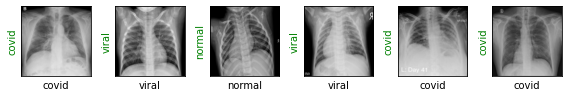

In [ ]:
images, labels = next(iter(dl_train))
show_images(images, labels, labels)

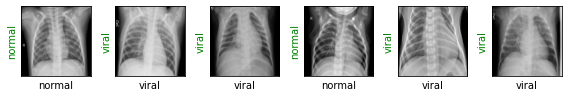

In [ ]:
images, labels = next(iter(dl_test))
show_images(images, labels, labels)

# **TASK 5 :CREATING THE MODEL[RESNET18]**

In [ ]:
resnet18 = torchvision.models.resnet18(pretrained=True) #setting pretrained=True as we wont be using pretrained weights
print(resnet18)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
 

In [ ]:
#out feture from 1000 to 3 because we are classifying ony 3
resnet18.fc = torch.nn.Linear(in_features=512, out_features=3)
loss_fn = torch.nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(resnet18.parameters(), lr=3e-5) #using Adam optimizer ... learning rate=3e-5

In [ ]:
def show_preds():
    resnet18.eval()
    images, labels = next(iter(dl_test))
    outputs = resnet18(images)
    _, preds = torch.max(outputs, 1) #indices of max values for all predictions.. we dont want the value we want the indices so we use _
    show_images(images, labels, preds)

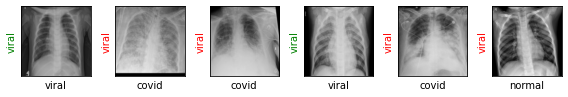

In [ ]:
show_preds()

# **TASK 6 : TRAINING THE MODEL [RESNET18]**

In [ ]:
vloss=[]
vloss1=[]
tloss=[]
tloss1=[]
ac=[]
tloss2=[]

In [ ]:
def train(epochs):
    print('Starting training...')
    for e in range(0, epochs):
        print('='*20)
        print(f'Starting epoch {e + 1}/{epochs}')
        print('='*20)

        train_loss = 0 #training loss
        val_loss = 0 #validation loss

        resnet18.train() # set model to training phase

        for train_step, (images, labels) in enumerate(dl_train):
            optimizer.zero_grad() #refreshing optimizer and setting grads to 0
            outputs = resnet18(images) #passing images to model
            loss1 = loss_fn(outputs, labels) #finding loss via loss function
            loss1.backward() #we are taking gradient step... essentially backprogation
            optimizer.step() #update all the parameter values w.r.t bpg
            train_loss += loss1.item()
            tloss.append(loss1.item())
            if train_step % 10 == 0: #every 10th step we evaluate our model
                print('Evaluating at step', train_step)

                accuracy = 0 #valication accuracy

                resnet18.eval() # set model to eval phase

                for val_step, (images, labels) in enumerate(dl_test):
                    outputs = resnet18(images)
                    loss = loss_fn(outputs, labels)
                    val_loss += loss.item()
                    _, preds = torch.max(outputs, 1)
                    accuracy += sum((preds == labels).numpy())
                tloss1.append(loss1.item())
                val_loss /= (val_step + 1)
                vloss.append(val_loss)
                accuracy = accuracy/len(test_dataset)
                ac.append(accuracy)
                print(f'Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}')
                show_preds()

                resnet18.train()

                if accuracy >= 0.90:
                    print('Performance condition satisfied, stopping..')
                    return

        train_loss /= (train_step + 1)
        tloss2.append(train_loss)

        print(f'Training Loss: {train_loss:.4f}')
    print('Training complete..')

Starting training...
Starting epoch 1/1
Evaluating at step 0
Validation Loss: 1.3271, Accuracy: 0.2556


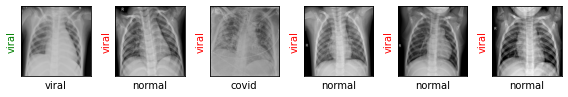

Evaluating at step 10
Validation Loss: 1.0186, Accuracy: 0.4556


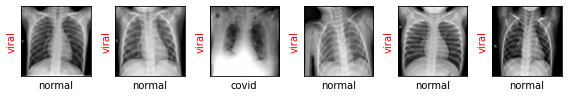

Evaluating at step 20
Validation Loss: 0.7246, Accuracy: 0.8222


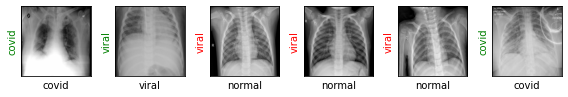

Evaluating at step 30
Validation Loss: 0.5240, Accuracy: 0.8667


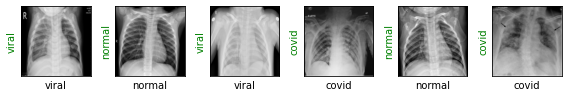

Evaluating at step 40
Validation Loss: 0.4761, Accuracy: 0.8556


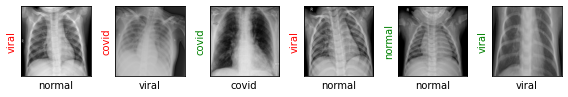

Evaluating at step 50
Validation Loss: 0.2794, Accuracy: 0.9333


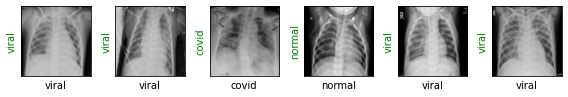

Performance condition satisfied, stopping..


In [ ]:
train(epochs=1)

# **TASK 7 : PLOTTING AND RESULT [RESNET-18]**

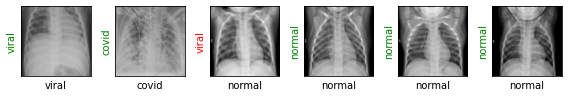

In [ ]:
show_preds()

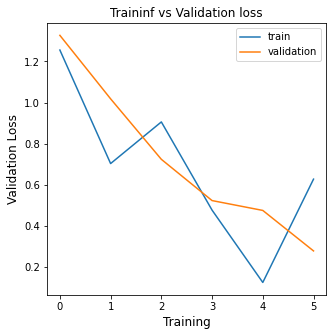

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.title("Traininf vs Validation loss")
plt.plot(tloss1, label='train')
plt.plot(vloss, label='validation')
plt.xlabel('Training', fontsize=12)
plt.ylabel('Validation Loss', fontsize=12)
plt.legend(loc='best')

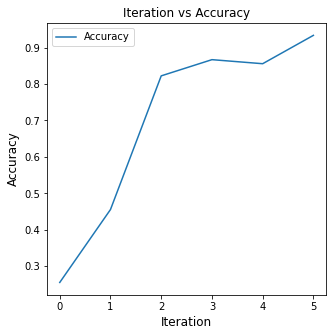

In [ ]:
fig = plt.figure(figsize=(5,5))
a=[0,10,20,30]
plt.title("Iteration vs Accuracy")
plt.plot(ac, label='Accuracy')
#plt.plot(vloss, label='validation')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='best')

#**TASK 8 :CREATING AND TRAINING[DENSENET]**

In [ ]:
densenet = torchvision.models.densenet161()
print(densenet)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [ ]:
#out feture from 1000 to 3 because we are classifying ony 3
densenet.fc = torch.nn.Linear(in_features=2208, out_features=3)
loss_fn = torch.nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(densenet.parameters(), lr=3e-5) #using Adam optimizer ... learning rate=3e-5

In [ ]:
def show_preds1():
    densenet.eval()
    images, labels = next(iter(dl_test))
    outputs = densenet(images)
    _, preds = torch.max(outputs, 1) #indices of max values for all predictions.. we dont want the value we want the indices so we use _
    show_images(images, labels, preds)

In [ ]:
dvloss=[]
dvloss1=[]
dtloss=[]
dtloss1=[]
dac=[]
dtloss2=[]

In [ ]:
def train(epochs):
    print('Starting training...')
    for e in range(0, epochs):
        print('='*20)
        print(f'Starting epoch {e + 1}/{epochs}')
        print('='*20)

        train_loss = 0 #training loss
        val_loss = 0 #validation loss

        densenet.train() # set model to training phase

        for train_step, (images, labels) in enumerate(dl_train):
            optimizer.zero_grad() #refreshing optimizer and setting grads to 0
            outputs = densenet(images) #passing images to model
            loss1 = loss_fn(outputs, labels) #finding loss via loss function
            loss1.backward() #we are taking gradient step... essentially backprogation
            optimizer.step() #update all the parameter values w.r.t bpg
            train_loss += loss1.item()
            dtloss.append(loss1.item())
            if train_step % 10 == 0: #every 20th step we evaluate our model
                print('Evaluating at step', train_step)

                accuracy = 0 #valication accuracy

                densenet.eval() # set model to eval phase

                for val_step, (images, labels) in enumerate(dl_test):
                    outputs = densenet(images)
                    loss = loss_fn(outputs, labels)
                    val_loss += loss.item()

                    _, preds = torch.max(outputs, 1)
                    accuracy += sum((preds == labels).numpy())
                dtloss1.append(loss1.item())
                val_loss /= (val_step + 1)
                dvloss.append(val_loss)
                accuracy = accuracy/len(test_dataset)
                dac.append(accuracy)
                print(f'Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}')

                show_preds()

                densenet.train()

                if accuracy >= 0.90:
                    print('Performance condition satisfied, stopping..')
                    return

        train_loss /= (train_step + 1)
        dtloss2.append(train_loss)
        print(f'Training Loss: {train_loss:.4f}')
    print('Training complete..')

Starting training...
Starting epoch 1/1
Evaluating at step 0
Validation Loss: 6.9227, Accuracy: 0.0000


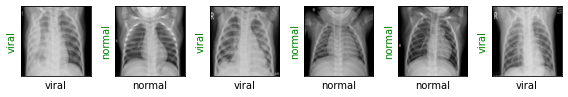

Evaluating at step 10
Validation Loss: 7.1143, Accuracy: 0.4222


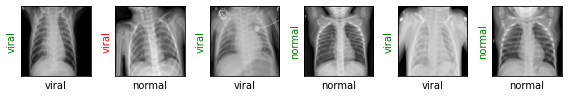

Evaluating at step 20
Validation Loss: 6.4828, Accuracy: 0.4556


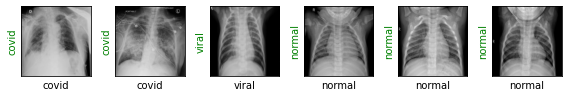

Evaluating at step 30
Validation Loss: 5.4929, Accuracy: 0.6111


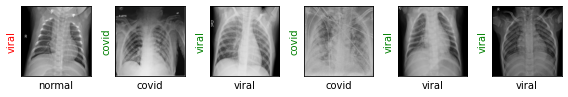

Evaluating at step 40
Validation Loss: 4.5049, Accuracy: 0.6556


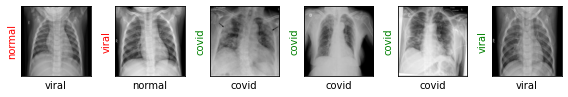

Evaluating at step 50
Validation Loss: 2.9080, Accuracy: 0.8556


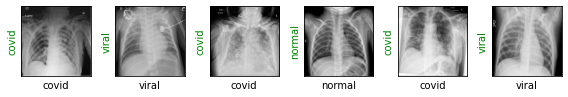

Evaluating at step 60
Validation Loss: 2.5299, Accuracy: 0.7667


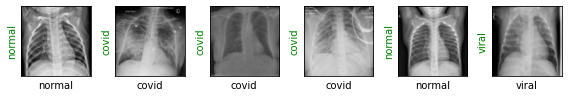

Evaluating at step 70
Validation Loss: 2.1684, Accuracy: 0.7556


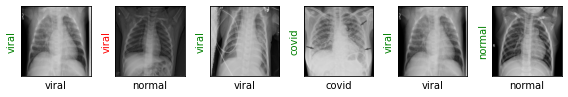

Evaluating at step 80
Validation Loss: 1.7974, Accuracy: 0.7333


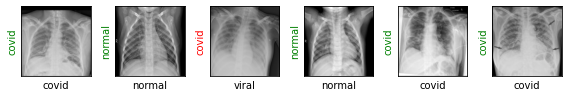

Evaluating at step 90
Validation Loss: 1.4255, Accuracy: 0.8111


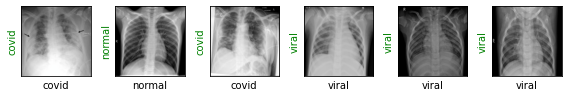

Evaluating at step 100
Validation Loss: 1.1846, Accuracy: 0.8444


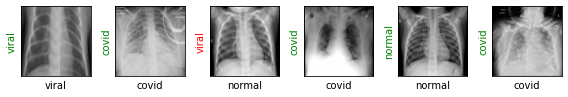

Evaluating at step 110
Validation Loss: 0.8394, Accuracy: 0.8444


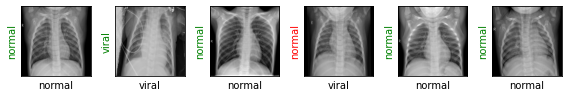

Evaluating at step 120
Validation Loss: 0.6520, Accuracy: 0.9111


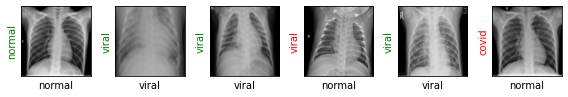

Performance condition satisfied, stopping..


In [ ]:
train(epochs=1)

# **TASK 9 : PLOTTING AND RESULTS[DENSENET]**

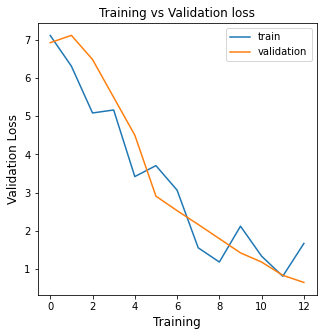

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.title("Training vs Validation loss")
plt.plot(dtloss1, label='train')
plt.plot(dvloss, label='validation')
plt.xlabel('Training', fontsize=12)
plt.ylabel('Validation Loss', fontsize=12)
plt.legend(loc='best')

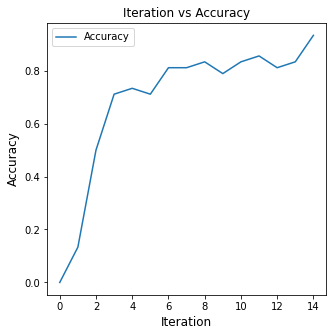

In [ ]:
fig = plt.figure(figsize=(5,5))
a=[0,10,20,30]
plt.title("Iteration vs Accuracy")
plt.plot(dac, label='Accuracy')
#plt.plot(dvloss, label='validation')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='best')

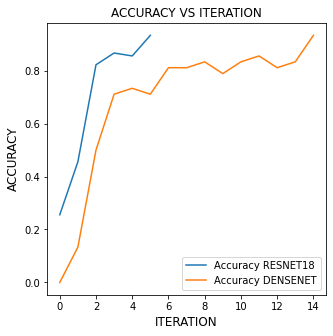

In [ ]:
fig = plt.figure(figsize=(5,5))
a=[0,10,20,30]
plt.title("ACCURACY VS ITERATION")
plt.plot(ac, label='Accuracy RESNET18')
plt.plot(dac, label='Accuracy DENSENET')
plt.xlabel('ITERATION', fontsize=12)
plt.ylabel('ACCURACY', fontsize=12)
plt.legend(loc='best')